# Lab | Random Forests

### Instructions

1) Apply the Random Forests algorithm but this time only by upscaling the data.
2) Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the bussiness?

- B = Will they donate?
- D = How much?

In [3]:
import pandas as pd
import numpy as np

In [4]:
categorical = pd.read_csv('files_for_lab/categorical.csv')

In [5]:
categorical.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3


In [6]:
# Get Nan Values:

categorical.isna().sum()

STATE           0
CLUSTER         0
HOMEOWNR        0
GENDER          0
DATASRCE        0
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_A        0
DOMAIN_B        0
ODATEW_YR       0
ODATEW_MM       0
DOB_YR          0
DOB_MM          0
MINRDATE_YR     0
MINRDATE_MM     0
MAXRDATE_YR     0
MAXRDATE_MM     0
LASTDATE_YR     0
LASTDATE_MM     0
FIRSTDATE_YR    0
FIRSTDATE_MM    0
dtype: int64

In [7]:
# GET ALL UNIQUE VALUES:

ml = [categorical[i].value_counts(dropna = False) for i in categorical.columns]

for i in ml: 
    print(i)
    print()

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

40    6295
35    3624
36    3617
27    3553
24    3539
49    3315
12    3000
18    2897
13    2706
30    2607
39    2601
45    2515
43    2385
11    2378
51    2322
14    2246
41    2176
44    1953
16    1947
2     1942
21    1891
8     1828
10    1804
46    1800
28    1630
17    1621
20    1568
53    1441
3     1428
34    1358
42    1358
23    1324
31    1285
22    1282
25    1275
38    1200
15    1173
1     1140
7     1076
5     1014
37     972
26     947
47     868
29     859
32     795
48     787
50     776
9      770
6      603
33     593
4      561
19     497
52     270
Name: CLUSTER, dtype: int64

H    74582
U    20830
Name: HOMEOWNR, dtype: int64

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

3    64829
2    23455
1     7128
Name: DATASRCE, dtype: 

In [8]:
# Columns to encode: 

col = ['STATE', 'HOMEOWNR', 'GENDER', 'RFA_2A', 'RFA_2R',  'GEOCODE2', 'DOMAIN_A']
df = pd.get_dummies(categorical, prefix = col, columns = col)


In [9]:
# Scaling 

from sklearn.preprocessing import MinMaxScaler

#Initializing and fitting
scaler = MinMaxScaler()
scaler.fit(df)

#Transforming data
categorical_scaled = scaler.transform(df)

In [10]:
categorical_scaled = pd.DataFrame(categorical_scaled)

In [11]:
categorical_scaled.columns = scaler.get_feature_names_out()

In [12]:
# VARIANCE THRESHOLD for FEATURE SELECTION

from sklearn.feature_selection import VarianceThreshold

var_thresh = 0.02

sel = VarianceThreshold(threshold = var_thresh)

sel = sel.fit(categorical_scaled)
temp = sel.transform(categorical_scaled)
temp_df = pd.DataFrame(temp)
print(categorical_scaled.shape)
print(temp_df.shape)

(95412, 46)
(95412, 41)


In [13]:
# Get Features Out

categorical = temp_df.copy()
categorical.columns = sel.get_feature_names_out()
categorical.head()

,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,DOB_YR,DOB_MM,MINRDATE_MM,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,...,RFA_2A_G,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_C,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.673077,1.0,0.333333,0.428571,0.381443,1.000000,0.636364,0.090909,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.250000,1.0,0.000000,0.785714,0.536082,0.090909,0.818182,1.000000,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.807692,1.0,0.333333,0.500000,0.000000,0.090909,0.909091,0.545455,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.826923,1.0,0.333333,0.285714,0.288660,0.000000,0.909091,0.909091,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.288462,1.0,0.333333,0.214286,0.206186,0.000000,0.818182,0.000000,0.5,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Numerical

In [14]:
numerical = pd.read_csv('files_for_lab/numerical.csv')

In [15]:
x = pd.DataFrame(numerical.isna().sum())
print(x.to_markdown())

|          |   0 |
|:---------|----:|
| TCODE    |   0 |
| AGE      |   0 |
| INCOME   |   0 |
| WEALTH1  |   0 |
| HIT      |   0 |
| MALEMILI |   0 |
| MALEVET  |   0 |
| VIETVETS |   0 |
| WWIIVETS |   0 |
| LOCALGOV |   0 |
| STATEGOV |   0 |
| FEDGOV   |   0 |
| WEALTH2  |   0 |
| POP901   |   0 |
| POP902   |   0 |
| POP903   |   0 |
| POP90C1  |   0 |
| POP90C2  |   0 |
| POP90C3  |   0 |
| POP90C4  |   0 |
| POP90C5  |   0 |
| ETH1     |   0 |
| ETH2     |   0 |
| ETH3     |   0 |
| ETH4     |   0 |
| ETH5     |   0 |
| ETH6     |   0 |
| ETH7     |   0 |
| ETH8     |   0 |
| ETH9     |   0 |
| ETH10    |   0 |
| ETH11    |   0 |
| ETH12    |   0 |
| ETH13    |   0 |
| ETH14    |   0 |
| ETH15    |   0 |
| ETH16    |   0 |
| AGE901   |   0 |
| AGE902   |   0 |
| AGE903   |   0 |
| AGE904   |   0 |
| AGE905   |   0 |
| AGE906   |   0 |
| AGE907   |   0 |
| CHIL1    |   0 |
| CHIL2    |   0 |
| CHIL3    |   0 |
| AGEC1    |   0 |
| AGEC2    |   0 |
| AGEC3    |   0 |
| AGEC4    |

In [16]:
#SCALING

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(numerical)
numerical_scaled = pd.DataFrame(scaler.transform(numerical), columns = scaler.get_feature_names_out())

In [17]:
numerical_scaled.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0.000000,0.608247,0.666667,1.000000,0.000000,0.000000,0.393939,0.343434,0.181818,0.101010,...,0.341463,0.005,0.001401,0.010,0.003676,0.006465,0.498045,0.0,1.000000,0.622951
1,0.000014,0.463918,0.833333,1.000000,0.066390,0.000000,0.151515,0.555556,0.111111,0.060606,...,0.024390,0.010,0.004004,0.025,0.016544,0.014399,0.774510,0.0,0.333333,0.000000
2,0.000014,0.624862,0.333333,0.111111,0.008299,0.000000,0.202020,0.292929,0.333333,0.060606,...,0.341463,0.002,0.002202,0.005,0.011029,0.006204,0.078617,1.0,1.000000,0.967213
3,0.000000,0.711340,0.000000,0.444444,0.008299,0.000000,0.232323,0.141414,0.313131,0.030303,...,0.170732,0.002,0.001201,0.010,0.008272,0.005534,0.899764,1.0,1.000000,0.655738
4,0.000000,0.793814,0.333333,0.222222,0.248963,0.010101,0.282828,0.090909,0.535354,0.262626,...,0.195122,0.003,0.002002,0.015,0.012868,0.005586,0.037079,1.0,0.333333,0.409836


In [18]:
# VARIANCE THRESHOLD for FEATURE SELECTION

var_thresh = 0.02

sel = VarianceThreshold(threshold = var_thresh)

sel = sel.fit(numerical_scaled)
temp = sel.transform(numerical_scaled)
temp_df = pd.DataFrame(temp)
print(numerical_scaled.shape)
print(temp_df.shape)

(95412, 315)
(95412, 79)


In [19]:
numerical = temp_df.copy()
numerical.columns = sel.get_feature_names_out()

In [20]:
numerical.head()

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,...,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0.608247,0.666667,1.000000,0.343434,0.181818,0.555556,0.0,0.353535,0.656566,0.929293,...,0.333333,0.656566,0.404040,0.285714,0.4,0.433333,0.498045,0.0,1.000000,0.622951
1,0.463918,0.833333,1.000000,0.555556,0.111111,1.000000,1.0,0.000000,0.000000,0.676768,...,1.000000,0.000000,1.000000,0.952381,0.8,0.183333,0.774510,0.0,0.333333,0.000000
2,0.624862,0.333333,0.111111,0.292929,0.333333,0.111111,0.0,0.020202,0.989899,0.969697,...,0.222222,0.777778,0.171717,0.428571,0.4,0.416667,0.078617,1.0,1.000000,0.967213
3,0.711340,0.000000,0.444444,0.141414,0.313131,0.000000,0.0,0.080808,0.929293,0.616162,...,0.232323,0.777778,0.222222,0.761905,0.4,0.433333,0.899764,1.0,1.000000,0.655738
4,0.793814,0.333333,0.222222,0.090909,0.535354,1.000000,1.0,0.000000,0.000000,0.020202,...,1.000000,0.010101,0.212121,0.285714,0.4,0.700000,0.037079,1.0,0.333333,0.409836


## Preparing for model fitting

In [23]:

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split


In [24]:
# X_y Split

X = pd.concat([numerical, categorical], axis = 1)
target = pd.read_csv('files_for_lab/target.csv')
y = target['TARGET_B']

In [25]:
y.value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [26]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

In [27]:
y_test.value_counts()

0    27133
1     1491
Name: TARGET_B, dtype: int64

In [28]:
y_train.value_counts()

0    63436
1     3352
Name: TARGET_B, dtype: int64

In [29]:
# Dealing with imbalanced Data

from sklearn.utils import resample

trainset = pd.concat([X_train, y_train], axis=1)

df_minority = trainset[trainset['TARGET_B'] == 1]
df_majority = trainset[trainset['TARGET_B'] == 0]

In [30]:
trainset.shape

(66788, 121)

In [31]:
df_majority.shape, df_minority.shape

((63436, 121), (3352, 121))

In [32]:
# Upsample: 

df_minority_upsampled = resample(df_minority, 
                                replace=True,
                                n_samples= len(df_majority),
                                random_state = 0)

In [33]:
df_minority_upsampled.TARGET_B.value_counts()

1    63436
Name: TARGET_B, dtype: int64

In [34]:
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [35]:
# Splitting 

y_train = df_upsampled['TARGET_B']
X_train = df_upsampled.drop('TARGET_B', axis = 1)

In [36]:
y_train.value_counts()

1    63436
0    63436
Name: TARGET_B, dtype: int64

In [67]:
# Grid Search
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import warnings 

model =RandomForestClassifier()

In [44]:
params = {'max_depth': [8,20, 30],
         'max_features': ('auto', 'sqrt')}

clf = GridSearchCV(model, params)
clf.fit(X_train, y_train)

/Users/steib/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/steib/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/steib/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 20, 30],
                         'max_features': ('auto', 'sqrt')})

In [51]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",clf.best_estimator_)
print("\n The best score across ALL searched params:\n",clf.best_score_)
print("\n The best parameters across ALL searched params:\n",clf.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=30, max_features='auto')

 The best score across ALL searched params:
 0.9994403785574699

 The best parameters across ALL searched params:
 {'max_depth': 30, 'max_features': 'auto'}


In [56]:
model = clf.best_estimator_

In [69]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
y_pred = model.predict(X_test)

In [73]:


print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(model.score(X_train, y_train)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(model.score(X_test, y_test)))


print(recall_score(y_test, y_pred, pos_label = 1))
print()
print(precision_score(y_test, y_pred))

The R2 for the Random Forest in the TRAIN set is 1.00
The R2 for the Random Forest in the TEST  set is 0.95
0.0026827632461435278

0.21052631578947367


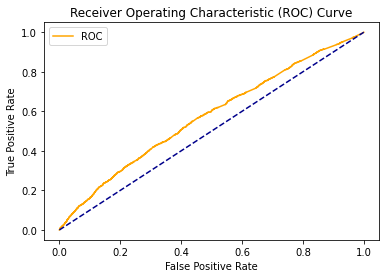

In [74]:
# Plotting the ROC Curve

from sklearn.metrics import plot_roc_curve, roc_curve, plot_precision_recall_curve
import matplotlib.pyplot as plt

def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

rfc_prediction = clf.predict_proba(X_test)
probs = rfc_prediction[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_curve(fper, tper)

## Improving the Model for Recall

In [75]:
from sklearn.metrics import cohen_kappa_score, make_scorer, precision_score, recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [76]:
# K_FOLD CROSS VALIDATION

cv = KFold(n_splits=5, random_state=1, shuffle=True) 


In [77]:
# TRY TO IMPROVE FOR RECALL

model = RandomForestClassifier()

recall_scorer = make_scorer(recall_score)

params = {'max_depth': [20,40,60],
         'max_features': ('auto', 'sqrt')}

clf = GridSearchCV(model, params, scoring = recall_scorer, cv=cv)
clf.fit(X_train, y_train) 


/Users/steib/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/steib/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/steib/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 40, 60],
                         'max_features': ('auto', 'sqrt')},
             scoring=make_scorer(recall_score))

In [78]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",clf.best_estimator_)
print("\n The best score across ALL searched params:\n",clf.best_score_)
print("\n The best parameters across ALL searched params:\n",clf.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=20, max_features='auto')

 The best score across ALL searched params:
 1.0

 The best parameters across ALL searched params:
 {'max_depth': 20, 'max_features': 'auto'}


In [79]:
model = clf.best_estimator_
model

RandomForestClassifier(max_depth=20, max_features='auto')

In [80]:
model = RandomForestClassifier(max_depth = 8)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print(recall_score(y_test, y_pred, pos_label = 1))
print()
print(precision_score(y_test, y_pred))
print()
print(confusion_matrix(y_test, y_pred))

0.448692152917505

0.0776732845698363

[[19189  7944]
 [  822   669]]
